In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings

%matplotlib inline

In [2]:
unicornios=pd.read_csv("unicornios.csv")

In [3]:
unicornios.head(10)

,Company,Valuation,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Date Joined
0,Bytedance,$180B,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,$100B,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,$100B,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,$95B,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Klarna,$46B,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011
5,Canva,$40B,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat...",2018
6,Checkout.com,$40B,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST...",2019
7,Instacart,$39B,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By...",2014
8,JUUL Labs,$38B,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management,2017
9,Databricks,$38B,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates...",2019


In [4]:
unicornios.shape

(1000, 10)

In [5]:
unicornios.describe()

,Year Founded,Date Joined
count,1000.000000,1000.00000
mean,2012.914000,2019.87600
std,5.727601,2.00715
min,1919.000000,2007.00000
25%,2011.000000,2019.00000
50%,2014.000000,2021.00000
75%,2016.000000,2021.00000
max,2021.000000,2022.00000


In [6]:
unicornios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1000 non-null   object
 1   Valuation         1000 non-null   object
 2   Industry          1000 non-null   object
 3   City              985 non-null    object
 4   Country           1000 non-null   object
 5   Continent         1000 non-null   object
 6   Year Founded      1000 non-null   int64 
 7   Funding           1000 non-null   object
 8   Select Investors  999 non-null    object
 9   Date Joined       1000 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 78.2+ KB


AHORA LO QUE TENEMOS QUE HACER ES ELIMINAR LOS SIMBOLOS QUE HAY EN LAS COLUMNAS DE VALUATION Y FUNDING

In [7]:
unicornios["Valuation"]=unicornios["Valuation"].str.replace("$","").astype("object")
unicornios["Valuation"]=unicornios["Valuation"].str.replace("B","").astype("object")

unicornios["Funding"]=unicornios["Funding"].str.replace("$","").astype("object")
unicornios["Funding"]=unicornios["Funding"].str.replace("B","").astype("object")
unicornios["Funding"]=unicornios["Funding"].str.replace("M","").astype("object")

C:\Users\guz_g\AppData\Local\Temp\ipykernel_8444\2202294303.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  unicornios["Valuation"]=unicornios["Valuation"].str.replace("$","").astype("object")
C:\Users\guz_g\AppData\Local\Temp\ipykernel_8444\2202294303.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  unicornios["Funding"]=unicornios["Funding"].str.replace("$","").astype("object")


In [8]:
unicornios.head(10)

,Company,Valuation,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Date Joined
0,Bytedance,180,Artificial intelligence,Beijing,China,Asia,2012,8,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,100,Other,Hawthorne,United States,North America,2002,7,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,100,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,95,Fintech,San Francisco,United States,North America,2010,2,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Klarna,46,Fintech,Stockholm,Sweden,Europe,2005,4,"Institutional Venture Partners, Sequoia Capita...",2011
5,Canva,40,Internet software & services,Surry Hills,Australia,Oceania,2012,572,"Sequoia Capital China, Blackbird Ventures, Mat...",2018
6,Checkout.com,40,Fintech,London,United Kingdom,Europe,2012,2,"Tiger Global Management, Insight Partners, DST...",2019
7,Instacart,39,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,3,"Khosla Ventures, Kleiner Perkins Caufield & By...",2014
8,JUUL Labs,38,Consumer & retail,San Francisco,United States,North America,2015,14,Tiger Global Management,2017
9,Databricks,38,Data management & analytics,San Francisco,United States,North America,2013,3,"Andreessen Horowitz, New Enterprise Associates...",2019


In [9]:
unicornios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1000 non-null   object
 1   Valuation         1000 non-null   object
 2   Industry          1000 non-null   object
 3   City              985 non-null    object
 4   Country           1000 non-null   object
 5   Continent         1000 non-null   object
 6   Year Founded      1000 non-null   int64 
 7   Funding           1000 non-null   object
 8   Select Investors  999 non-null    object
 9   Date Joined       1000 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 78.2+ KB


COMO PODEMOS OBSERVAR LOS VALORES DE VALUATION Y FUNDING SON DE TIPO OBJECT HAY QUE PASARLOS A TIPO "INT64"

In [10]:
unicornios["Valuation"] = unicornios["Valuation"].astype(object).astype("int64")
unicornios["Funding"]= unicornios["Funding"].astype(object).astype("string")
unicornios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1000 non-null   object
 1   Valuation         1000 non-null   int64 
 2   Industry          1000 non-null   object
 3   City              985 non-null    object
 4   Country           1000 non-null   object
 5   Continent         1000 non-null   object
 6   Year Founded      1000 non-null   int64 
 7   Funding           1000 non-null   string
 8   Select Investors  999 non-null    object
 9   Date Joined       1000 non-null   int64 
dtypes: int64(3), object(6), string(1)
memory usage: 78.2+ KB


AL REVISAR LA TABLA DE EDATOS HAY VARIAS FILAS QUE NO TIENEN DATOS NOS DISPUSIMOS A FILTRARLOS Y UNA VEZ QUE SABEMOS LOS INDICES A LOS QUE PERTENECEN LOS ELIMINAMOS DEL DF

In [16]:
unicornios[unicornios["Funding"]=="Unknown"]
unicornios.drop([215,424,567,639,651,717,733,866,890,945,947],axis=0, inplace=True)
#unicornios.info()


,Company,Valuation,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Date Joined


AQUI NOS DISPONEMOS A CAMBIAR EL FORMATO DE LA COLUMNA FUNDING PARA EMPEZAR EL ANALISIS EXPLORATORIO

In [17]:
unicornios["Funding"]= unicornios["Funding"].astype(object).astype("int64")

0.5582663786986625

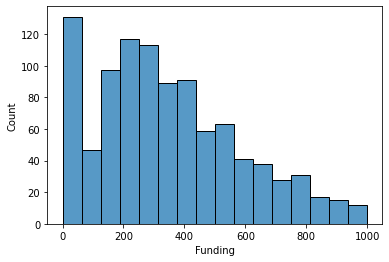

In [22]:
sns.histplot(unicornios["Funding"])
unicornios["Funding"].skew()

In [23]:
unicornios["Funding"].kurt()

-0.31288557414464924

In [ ]:
ANALIZAREMOS LOS PAISES QUE TIENEN STARTUPS

In [1]:
total_pais=pd.concat([unicornios['Country'],unicornios['Date Joined']],axis=1)


NameError: name 'pd' is not defined

***f,ax=plt.subplots(figsize=(20,8))
ax1=sns.barplot(x="Year Founded", y="Continent", data=unicornios, color='#63b3c0',ax=axis[0]).set(title='Paises Con Start')
ax1.set_xticks([2000,2005, 2010,2015, 2020, 2022])
ax1.set_xticklabels(['1M','2M','3M','4M','5M','6M','7M','8M'])
plt.xlabel('Revenue in Million')
plt.title('Top 10 countries that purchase the most')***
